Shape of the dataset (148, 549)
Dataset variable types: rate               float64
0                   object
1                   object
2                   object
3                   object
                    ...   
mean_green_hist    float64
max_red_hist       float64
min_red_hist       float64
max_green_hist     float64
min_green_hist     float64
Length: 549, dtype: object
First 10 rows of the dataset
   rate               0               1               2                 3  \
0   4.7  2.47115556e+04  1.61302778e+03  7.60157407e+02  6.89444444e+02\n   
1   7.2  2.78458435e+04  3.61925217e+03  2.93840000e+03  1.59220870e+03\n   
2   7.8  2.33913418e+04  1.36652532e+03  6.38291139e+02  8.30386076e+02\n   
3   7.1  20288.05479452   1980.80821918    552.99315068    394.70547945\n   
4   7.5  2.29062034e+04  1.23541808e+03  8.31406780e+02  8.96559322e+02\n   
5   4.9  1.89137540e+04  3.06936508e+02  2.83976190e+02  1.15740476e+03\n   
6   7.4  9.18196407e+03  5.30958683e+03  3.73282036e

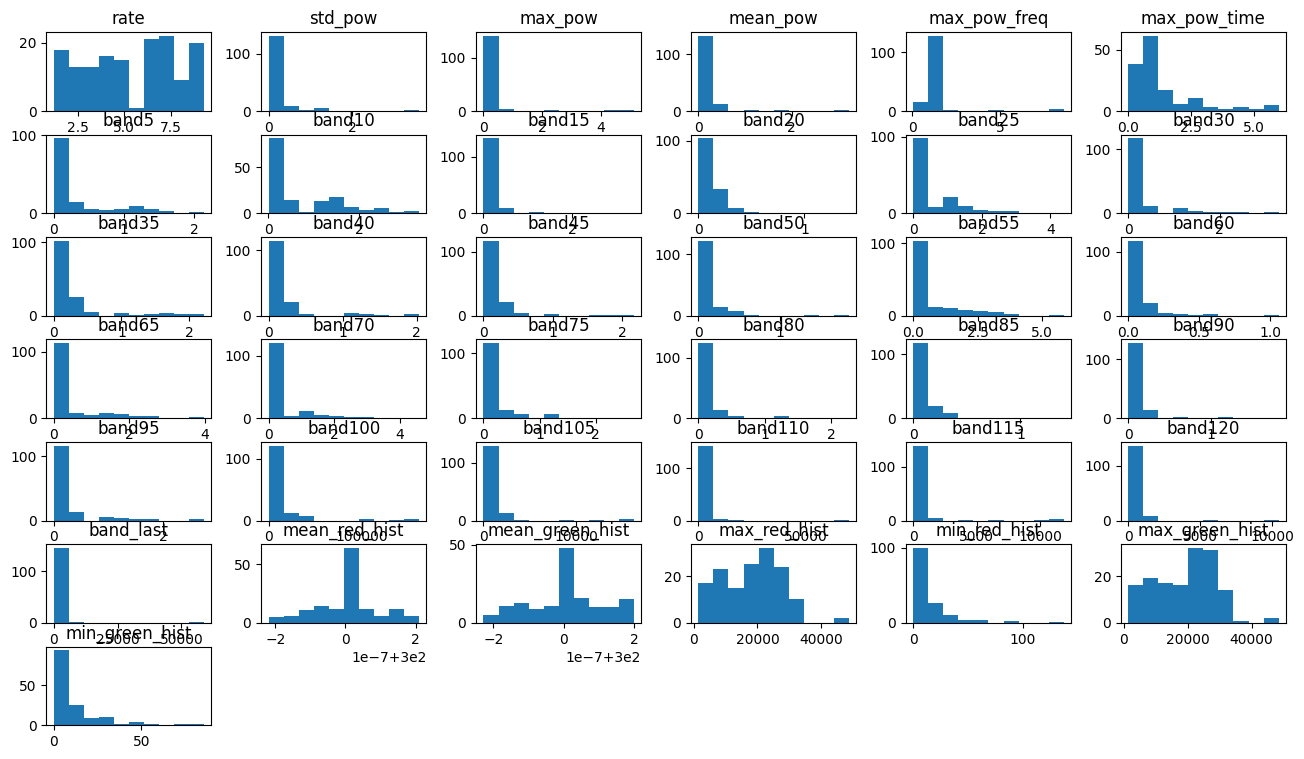

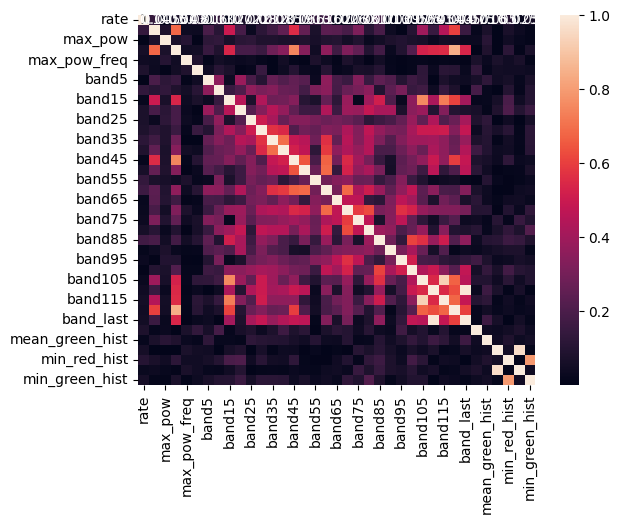

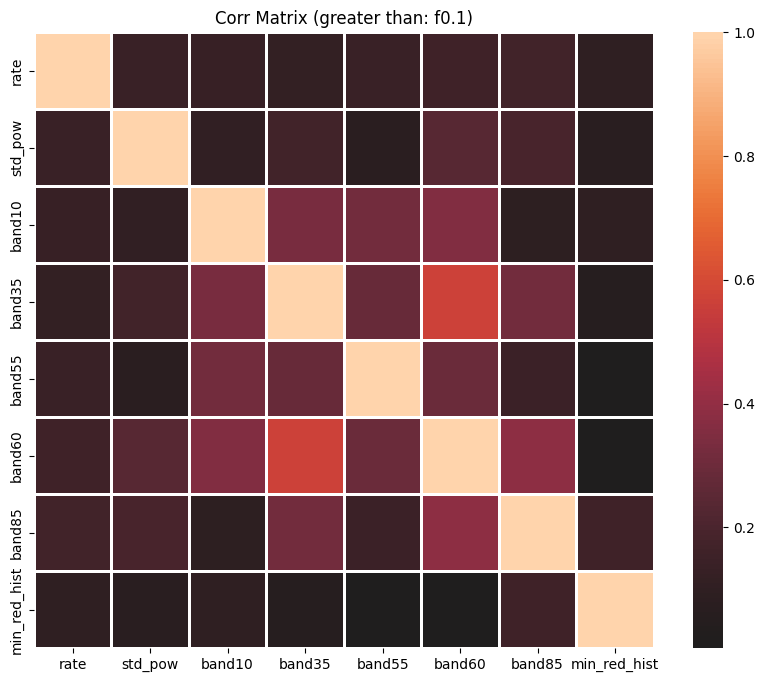





Linear Regression R^2 Score: -0.7527971174957848
Linear Regression Time: 0.01563739776611328
Decision Tree R^2 Score: -0.43179565356489125
Decision Tree Time: 0.051355838775634766
Random Forest R^2 Score: 0.10966013122171181
Random Forest Time: 3.54539155960083
Gradient Boosting R^2 Score: -0.11527890531640295
Gradient Boosting Time: 2.576674222946167
Extra Trees R^2 Score: 0.19583333479018727
Extra Trees Time: 0.8868167400360107


The Best Model: Extra Trees
R^2 Score of the Best Model: 0.19583333479018727




Linear Regression CV - r2score :  -1.2357589587012066
Linear Regression test-r2score :  -0.7527971174957848
Linear Regression: 0.04425239562988281 sn

Decision Tree CV - r2score :  -1.1616845973253047
Decision Tree test-r2score :  -0.4317956535648912
Decision Tree: 0.33378148078918457 sn

Random Forest CV - r2score :  -0.0870662813901231
Random Forest test-r2score :  0.1096601312217118
Random Forest: 33.61622476577759 sn

Gradient Boosting CV - r2score :  -0.2991848837853379

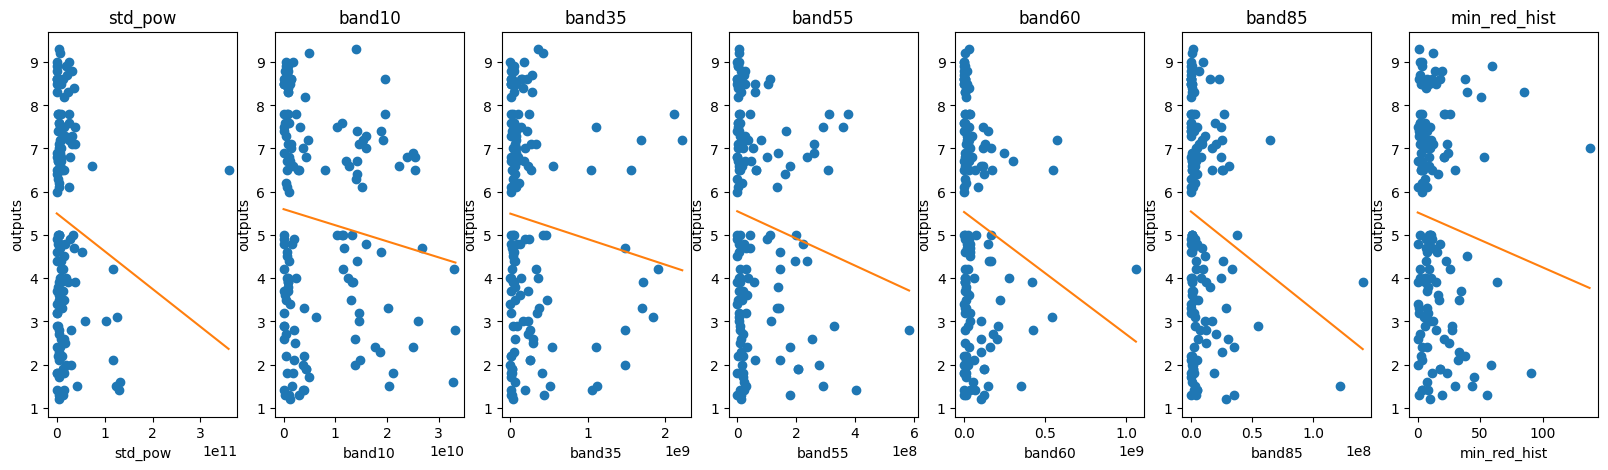

<Figure size 500x500 with 0 Axes>

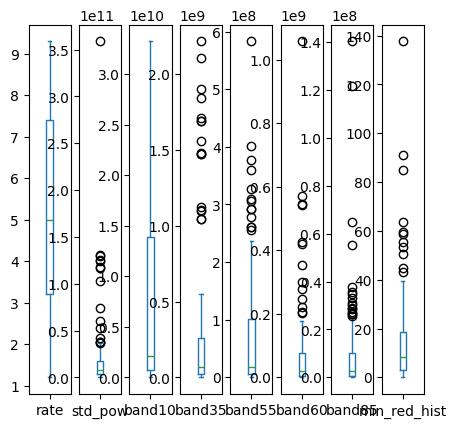

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 28 22:23:48 2024

@author: İrem Beyza Gül
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler



data = pd.read_excel("moviadata.xlsx")

zero_columns = data.columns[(data == 0).all()]
data.drop(columns=zero_columns, inplace=True)
data.drop(columns="blue_hist", inplace=True)

value = []  
value_list = [] 
value_df = []  
value2 = []  
value_list2 = [] 
value_df2 = []


for i in range(148):
    value = data.iloc[i, 1]
    
    
    value = value.replace('[', '').replace(']', '')
    
   
    split_values = [x for x in value.split(' ') if x]  
    value_list.extend(split_values)  


num_rows = len(value_list) // 148
num_columns = 148 
reshaped_values = [value_list[i*num_rows:(i+1)*num_rows] for i in range(num_columns)] 


combined_df = pd.DataFrame(reshaped_values)


for i in range(148):
    value2 = data.iloc[i, 2]
    
    
    value2 = value2.replace('[', '').replace(']', '')
    
    
    split_values2 = [x for x in value2.split(' ') if x]  
    value_list2.extend(split_values2)  


num_rows2 = len(value_list2) // 148  
num_columns2 = 148 
reshaped_values2 = [value_list2[i*num_rows2:(i+1)*num_rows2] for i in range(num_columns2)]  


combined_df2 = pd.DataFrame(reshaped_values2)

result_df = pd.concat([combined_df, combined_df2], axis=1)
data['red_hist'] = data['red_hist'].str.replace('[', '').str.replace(']', '')
data['red_hist'] = data['red_hist'].apply(lambda x: x.split())
data['red_hist'] = data['red_hist'].apply(lambda x: [float(i) for i in x])
data['mean_red_hist'] = data['red_hist'].apply(lambda x: sum(x) / len(x))

data['green_hist'] = data['green_hist'].str.replace('[', '').str.replace(']', '')
data['green_hist'] = data['green_hist'].apply(lambda x: x.split())
data['green_hist'] = data['green_hist'].apply(lambda x: [float(i) for i in x])
data['mean_green_hist'] = data['green_hist'].apply(lambda x: sum(x) / len(x))

data['max_red_hist'] = data['red_hist'].apply(max)
data['min_red_hist'] = data['red_hist'].apply(min)

data['max_green_hist'] = data['green_hist'].apply(max)
data['min_green_hist'] = data['green_hist'].apply(min)

data.drop(columns="red_hist", inplace=True)
data.drop(columns="green_hist", inplace=True)

datason = pd.concat([result_df, data], axis=1)
rate_column = datason.pop('rate')
datason.insert(0, 'rate', rate_column)

rate = datason.columns.get_loc('rate')

print("Shape of the dataset",datason.shape)
print("Dataset variable types:",datason.dtypes)
print("First 10 rows of the dataset")
print(datason.head(10))
print("Statistical data of the dataset")
description=datason.describe()
print(description)

datason.hist(bins=10,figsize=(16,9),grid=False);


print("The correlation coefficient of the variables in the data set with each other")
corr=np.abs(data.corr(method='pearson'))
plt.figure()
sns.heatmap(corr, annot = True)




selected_column_name = datason.columns[rate]
column_correlations = corr[selected_column_name]
threshold = 0.1
filtered_correlations = column_correlations[abs(column_correlations) >= threshold]
selected_columns = filtered_correlations.index
filtered_corr = corr.loc[selected_columns, selected_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=False, fmt=".2f", linewidths=0.9, center=0)
plt.title(f"Corr Matrix (greater than: f{threshold})")
plt.show()

new_df = datason[selected_columns].copy()




features =new_df.drop(new_df.columns[0], axis=1)
predict = datason.iloc[:,rate]

plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    
    plt.subplot(1, len(features.columns), i+1)
    x = new_df[col]
    y = predict
    plt.plot(x, y, 'o')
    
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('outputs')


plt.figure(figsize=(5, 5))
new_df.plot(kind='box', subplots=True, layout=(1,10), sharex=False, sharey=False)

print("\n")
print("\n")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x = datason.iloc[:,1:].values 
y = datason.iloc[:,0].values 
x = x.astype(float)
y =y.astype(float)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47,shuffle=True)

sc=StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score
import time
from sklearn.model_selection import StratifiedKFold,cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Linear Regression
start_time = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
lr_time = time.time() - start_time
print("Linear Regression R^2 Score:", r2_lr)
print("Linear Regression Time:", lr_time)

# Decision Tree
start_time = time.time()
model = DecisionTreeRegressor(random_state=47)
model.fit(X_train, y_train)
y_pred_dtc = model.predict(X_test)
r2_dtc = r2_score(y_test, y_pred_dtc)
dtc_time = time.time() - start_time
print("Decision Tree R^2 Score:", r2_dtc)
print("Decision Tree Time:", dtc_time)

# Random Forest
start_time = time.time()
model = RandomForestRegressor(random_state=47)
model.fit(X_train, y_train)
y_pred_rfc = model.predict(X_test)
r2_rfc = r2_score(y_test, y_pred_rfc)
rfc_time = time.time() - start_time
print("Random Forest R^2 Score:", r2_rfc)
print("Random Forest Time:", rfc_time)

# Gradient Boosting
start_time = time.time()
model = GradientBoostingRegressor(random_state=47)
model.fit(X_train, y_train)
y_pred_gbr = model.predict(X_test)
r2_gbr = r2_score(y_test, y_pred_gbr)
gbr_time = time.time() - start_time
print("Gradient Boosting R^2 Score:", r2_gbr)
print("Gradient Boosting Time:", gbr_time)

# Extra Trees
start_time = time.time()
model =ExtraTreesRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred_etr = model.predict(X_test)
r2_etr = r2_score(y_test, y_pred_etr)
etr_time = time.time() - start_time
print("Extra Trees R^2 Score:", r2_etr)
print("Extra Trees Time:", etr_time)


models = {
    "Linear Regression": r2_lr,
    "Decision Tree": r2_dtc,
    "Random Forest": r2_rfc,
    "Gradient Boosting": r2_gbr,
    "Extra Trees": r2_etr
}
print("\n")
best_model = max(models, key=models.get)
best_r2_score = models[best_model]

print("The Best Model:", best_model)
print("R^2 Score of the Best Model:", best_r2_score)
print("\n")
print("\n")

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
import time
import pickle

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=47),
    "Random Forest": RandomForestRegressor(random_state=47),
    "Gradient Boosting": GradientBoostingRegressor(random_state=47),
    "Extra Trees": ExtraTreesRegressor(random_state=47)
}

num_folds = 10
results = {}
start_time0 = time.time()
for name, model in models.items():
    start_time = time.time()
    
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=47)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="r2")
    
    mean_r2score = cv_results.mean()
    
    model.fit(X_train, y_train)
    test_r2score = model.score(X_test, y_test)
    results[name] = test_r2score
    
    print(f"{name} CV - r2score :  {mean_r2score:.16f}")
    print(f"{name} test-r2score :  {test_r2score:.16f}")
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"{name.ljust(8)}: {elapsed_time} sn\n")
    
end_time0 = time.time()
elapsed_time = end_time0 - start_time0
print(f"{elapsed_time} sn")

print("\n")

best_model = max(results, key=results.get)
print("Best model according to test data ", best_model)

models_dict = dict(models)

best_model_instance = models_dict.get(best_model)
best_model_instance.fit(X_train, y_train)


test_r2score = best_model_instance.score(X_test, y_test)
print("Test set r2 score (best model):", test_r2score)


y_pred = best_model_instance.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print("\nEvaluation metrics for the best model({}):".format(best_model))
print("Test set r2 score:", test_r2score)
print("Test set MSE (Mean Square Error):", mse)
print("Test set MAE (Mean Absolute Error):", mae)

with open('en_iyi_model.pkl', 'wb') as f:
    pickle.dump(best_model_instance, f)